In [1]:
# import some libraries
import numpy as np                # for vector, matrix etc data structures and manipulations
import matplotlib.pyplot as plt   # for plotting
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax


# The History of Quantum Mechanics

At the end of the 19th century, it was widely believed that classical physics could explain all phenomena.  There were a few observations, however, that had yet to receive an adequate explanation in classical physics.  These included blackbody radiation, the photoelectric effect, the heat capacity of some solids at low temperature and the atomic spectra (specifically the hydrogen atom spectrum).  Physicists such as Max Planck, Albert Einstein, and Niels Bohr introduced the idea of quantizing energies and other quantities to explain the experimental data of these phenomena.  Following this, physicists such as Werner Heisenberg, Max Born and Erwin Schrodinger developed the quantum mechanics formalism that we use today.

## Timeline

1900 - Planck explained blackbody radiation by quantizing electron energy levels

1905 - Einstein resolves photoelectric effect with quantization

1907 - Einstein resolves heat capacities of solids at low temperature with vibrational quantization

1911 - Bohr model for atom explains hydrogen atom spectrum

1918 - Max Planck wins Nobel prize in physics for blackbody radiation explanation

1921 - Einstein wins Nobel prize in physics for photoelectric effect

1922 - Niels Bohr wins Nobel prize in physics for hydrogen atom quantization

1929 - de Broglie wins Nobel prize in physics for wave-particle duality

1932 - Heisenberg wins Nobel prize in physics for formalization of quantum mechanics

1933 - Schrodinger and Dirac share Nobel prize in physics for formalization of quantum mechanics

1954 - Max Born wins Nobel prize in physics for statistical interpretation of wavefunction

## Blackbody catastrophe

![title](img/600px-Black_body.png)

Light radiating from a "blackbody," a source that emits over a large wavelength span, has a measured spectral radiance given above.  These spectra are temperature dependent.  The spectra cannot be explained using classical physics.  The classical solution was derived by Lord Rayleigh and J. H. Jeans and is given by

$B(\lambda,T) = \frac{2ck_BT}{\lambda^4}, \tag{1}$

where $c$ is the speed of light, $\lambda$ is the wavelength, $k_B$ is Boltzmann's constant and $T$ is temperature.  This function is labeled as the "classical" curve in the plot above for $T=5000$ K.  As we can see, it clearly does not agree with the blue curve also at 5000 K.

This was perplexing to the physicists at the time and no theory was able to explain this until Max Planck made the assumption that the energy levels were discrete (rather than contiunous).  This lead to an expression for the spectral distribution function of:

$B(\lambda,T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}. \tag{2}$

The only new term in this expression is $h$ which is termed Planck's constant.  The value of this constant was unknown at the time but was the only unknown in the above equation so could be fit to experimental data for a particular temperature.  Doing this, Planck arrived at a value of $h = 6.626 \times 10^{-34}$ J$\cdot$s.

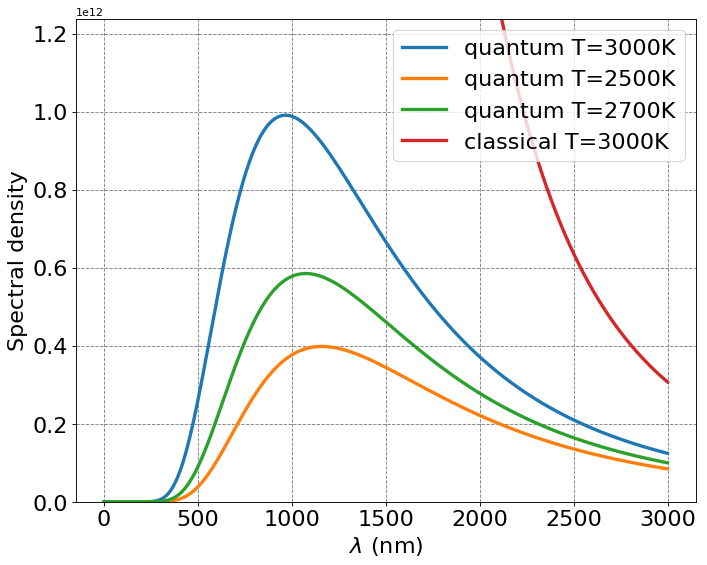

In [4]:
h = 6.626E-34  # J*s
c = 3.0E8      # m/s
kB = 1.380E-23 # J/K
nm_to_m = 1.0E-9 # convert nm to m

# classical spectral distribution function
def classicalB(x,T):
    return 2*c*kB*T/(x*nm_to_m)**4

# quantum spectral distribution function
def quantumB(x,T):
    return 2*h*c**2/(x*nm_to_m)**5/(np.exp(h*c/(x*nm_to_m*kB*T))-1)

# initialize a figure
ax = define_figure(xlabel="$\lambda$ (nm)",ylabel="Spectral density")
# make an array containing domain of wavelengths to consider
x = np.arange(1.0,3000,1)
plt.ylim((0.0,np.amax(quantumB(x,3000))*1.25))
# plot quantum result
ax.plot(x,quantumB(x,3000),label="quantum T=3000K",lw=3)
ax.plot(x,quantumB(x,2500),label="quantum T=2500K",lw=3)
ax.plot(x,quantumB(x,2700),label="quantum T=2700K",lw=3)
# plot classical result
ax.plot(x,classicalB(x,3000),label="classical T=3000K",lw=3)
# make legend
ax.legend(fontsize=20,markerscale=5.0)

## Photoelectric effect

Despite the success of Planck's model for the blackbody radiation, the idea the energy is quantized in certain situations was not generally accepted.  Around 1887, a german physicist by the name of Heinrich Hertz discovered what is now called the photoelectric effect: shining ultraviolet light at a metallic surface causes electrons to be emitted from the surface.  Two observations made during this experiment were in contrast with classical theory.  Namely that the energy of the emitted electrons is independent of the intensity of the incident light and that there is a threshold frquency of incident light below which no electrons are ejected from the surface.  These results could not be explained by classical mechanics.  Albert Einstein attempted to explain this phenomenon by first quantizing the energy levels of the electrons similar to what Planck did:

$ E = nh\nu. \tag{3} $

Einstein took this one step further and suggested that the light energy emitted was also quantized packets of energy, now known as photons (Planck assumed the emitted light was a classical wave).  These suggests lead to the conclusion that the kinetic energy of emitted light will have the following form:

$KE = h\nu - h\nu_0. \tag{4}$

This result was able to explain the experiment.  The above equation demonstrates that the kinetic energy of the emitted electron will be equal to the energy (not intensity) of the incident light minus a threshold energy which is also called a work function.  

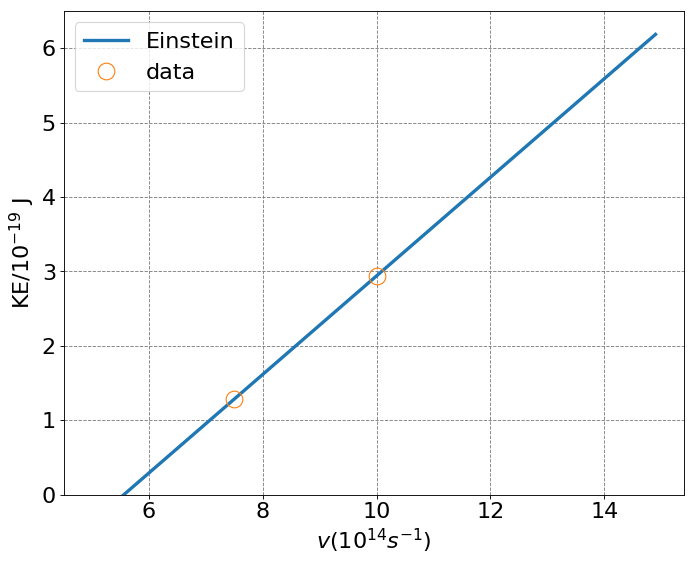

In [37]:
# Photoelectric effect for Lithium
h = 6.626e-1  # converted unites
c = 3.0E8      # m/s

v0 = 5.564 # E14 for Lithium

# quantum spectral distribution function
def photoelectric(x):
    return h*x - h*v0

# initialize a figure
ax = define_figure(xlabel='$ v (10^{14}s^{-1})$',ylabel="KE$/10^{-19}$ J")
# make an array containing domain of wavelengths to consider
x = np.arange(5.0,15,0.1)
plt.ylim((0.0,np.amax(photoelectric(x))*1.05))
# plot quantum result
ax.plot(x,photoelectric(x),label="Einstein",lw=3)
xdata = [c/300E-9*1E-14,c/400E-9*1E-14]
ydata = [2.935,1.280]
ax.plot(xdata,ydata,'o',markersize=15,mfc='none',label='data')
ax.plot()
# make legend
ax.legend(fontsize=20,markerscale=1.0)

## Einstein Solid

The classical result for the heat capacity of a solid at constant volume is $3R$.  This is the Dulong and Petit law.  This suggest that the heat capacity of a solid is independent of temperature.  This was found to be incorrect experimentally and again serve as an embarassment for classical physics.  Two years after his work on the photoelectric effect, Einstein explained the heat capacity of a solid by quantizing the vibrational energy levels.  This was the first time that the energy of anything other than an electron had been quantized.  After quantizing the vibrational energy levels, the heat capacity of a solid can be derived as (left for Statistical Mechanics):

$C_V = 3Nk_B\left(\frac{\epsilon}{2k_B T}\right)^2\frac{1}{\sinh^2\left( \frac{\epsilon}{2k_B T} \right)} \tag{5}$

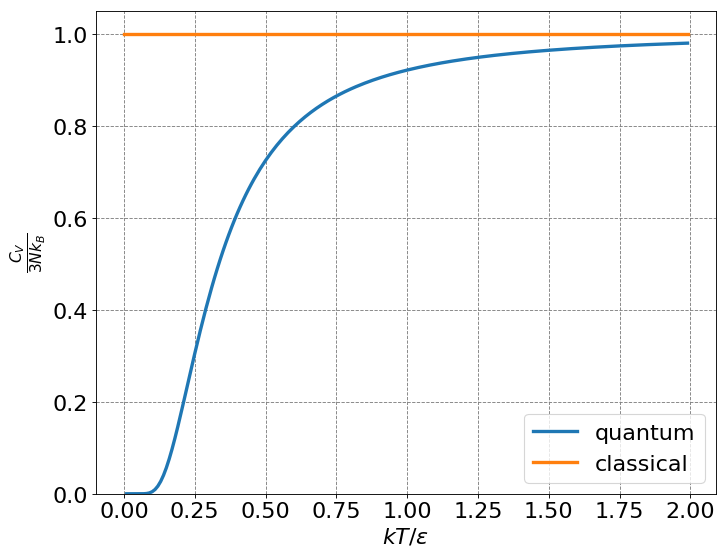

In [35]:
# classical spectral distribution function
def classicalCv(T):
    return np.ones(len(T))

# quantum spectral distribution function
def quantumCv(T):
    return (1.0/T)**2 * np.exp(1.0/T)/(np.exp(1.0/T)-1)**2

# make an array containing domain of wavelengths to consider
x = np.arange(0,2,0.01)
# setup plot parameters
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'$kT/\epsilon$',size=20)
ax.set_ylabel(r'$\frac{C_V}{3Nk_B}$',size=20)
plt.tick_params(axis='both',labelsize=20)
plt.ylim((0.0,1.05))
# plot quantum result
ax.plot(x,quantumCv(x),label="quantum",lw=3)
# plot classical result
ax.plot(x,classicalCv(x),label="classical",lw=3)
# make legend
ax.legend(fontsize=20,markerscale=5.0)

## Hydrogen Atom Spectrum

![hatom](img/spectrumwav.gif)

Potentially the most famous success of quantum mechanics is assigning the hydrogen atom spectrum.  Niels Bohr was able to do this by creating a model for the hydrogen atom in which the electron revolves around the nucleus with quantized angular momentum.  Bohr demonstrated that this leads to the following energy levels (we will derive this later):

$ E_n = -\frac{m_ee^4}{8\epsilon_0h^2}\frac{1}{n^2}, n=1,2,... \tag{6}$

This correctly represented the hydrogen atom spectrum.  

## Formalism

Heisenberg, Schrodinger and Dirac are known for formalising quantum mechanics.  The results presented above all fit into this formalism.  We will start into this on Friday when discussing the postulates.